### CSE-221710302060-Shaik Shoaib Aslam

### For 19/06/2020 and 20/06/2020

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Reading the csv file
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
# Adding Family column based on SibSp and Parch
df['Family'] = df['SibSp'] + df['Parch']
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [70]:
# As Ticket being just a random number we can skip this columns from our analysis

In [71]:
df.Family.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Family, dtype: float64

In [72]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [73]:
# Based on Categories we divide fare column as low, mid, high
df['Fare_category'] = pd.cut(df.Fare, bins = [0,7.9,14.45,31.00,512],
                                labels = ['Low','Mid','Mid-high','High'])
df['Fare_category'].head()

0     Low
1    High
2     Mid
3    High
4     Mid
Name: Fare_category, dtype: category
Categories (4, object): [Low < Mid < Mid-high < High]

In [74]:
# Comparing Fare and Fare_Category
df[['Fare','Fare_category']]

,Fare,Fare_category
0,7.2500,Low
1,71.2833,High
2,7.9250,Mid
3,53.1000,High
4,8.0500,Mid
...,...,...
886,13.0000,Mid
887,30.0000,Mid-high
888,23.4500,Mid-high
889,30.0000,Mid-high


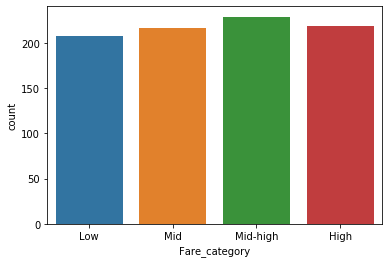

In [75]:
# Visualizing Fare Category 
sns.countplot(x = 'Fare_category',data = df)

Text(0.5, 1.0, 'Survival based on Fare Category')

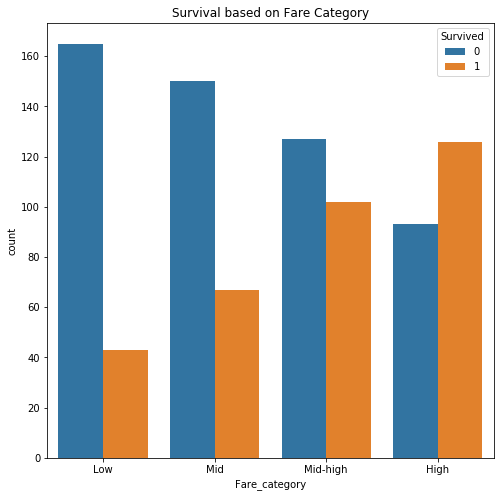

In [76]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'Fare_category',hue = 'Survived',data = df).\
                set_title("Survival based on Fare Category")

In [77]:
df.Embarked.value_counts(normalize = True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

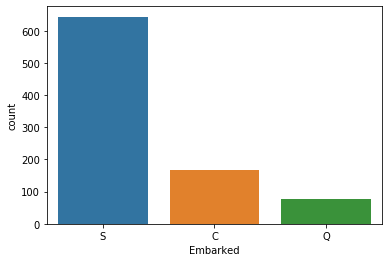

In [78]:
# Visualizing Embarked Column
sns.countplot('Embarked',data = df)

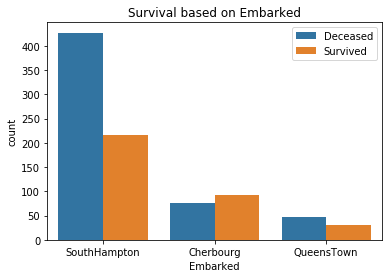

In [79]:
p = sns.countplot('Embarked',hue = 'Survived',data = df)
p.set_xticklabels(['SouthHampton','Cherbourg','QueensTown'])
p.set_title("Survival based on Embarked")
p.legend(labels = ['Deceased', 'Survived'])

In [80]:
df.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [81]:
# Imputing Cabin Column, filling with ' NA '
df.Cabin.fillna('NA',inplace = True)

In [82]:
df.Cabin.isnull().sum()

0

In [83]:
df.Age.isnull().sum()

177

In [84]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [85]:
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [86]:
# Imputing Age column
# Filling the NaN Values of Age Column with the Median of that column
df.Age.fillna(df.Age.median(),inplace = True)
df.Age.isna().sum()

0

In [87]:
# Imputing Embarked Column
# Filling the NaN Values of Embarked Column with mode of that column
df.Embarked.fillna(df.Embarked.mode()[0],inplace = True)
df.Embarked.isna().sum()

0

In [88]:
#Imputing Fare Column
df.Fare_category.isna().sum()

18

In [89]:
df.Fare_category.fillna(df.Fare_category.mode()[0],inplace = True)
df.Fare_category.isna().sum()

0

In [90]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Family           0
Fare_category    0
dtype: int64

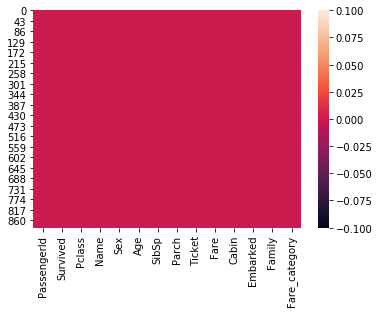

In [91]:
sns.heatmap(df.isnull())

In [92]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid


In [93]:
df['Age-Range'] = pd.cut(df.Age,[0,10,20,30,40,60,80])
df[['Age','Age-Range']].head()

,Age,Age-Range
0,22.0,"(20, 30]"
1,38.0,"(30, 40]"
2,26.0,"(20, 30]"
3,35.0,"(30, 40]"
4,35.0,"(30, 40]"


In [94]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_category,Age-Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,Low,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,Mid,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,Mid,"(30, 40]"


#### Encoding Of Categorical Variables/columns

In [95]:
dummy_set = pd.get_dummies(df.Fare_category,drop_first = True) # n columns we need to include n-1 columns
dummy_set

,Mid,Mid-high,High
0,0,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
886,1,0,0
887,0,1,0
888,0,1,0
889,0,1,0


In [96]:
df = pd.concat([df,dummy_set],axis = 1)

In [97]:
df = pd.concat([df,pd.get_dummies(df.Cabin,prefix = 'Cabin',drop_first = True),
                   pd.get_dummies(df.Embarked,prefix = 'Emb',drop_first = True),
                   pd.get_dummies(df.Fare_category,prefix = 'Fare',drop_first = True),
                   pd.get_dummies(df['Age-Range'],drop_first = True)],axis = 1)

In [98]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-high,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,1,0,0,0,0,1,0,0


In [99]:
# Encoding sex column using Label Encoder
from sklearn.preprocessing import LabelEncoder
df['Sex']= LabelEncoder().fit_transform(df.Sex)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-high,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,1,1,0,0,0,0,1,0,0


In [100]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-high,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,...,0,1,0,0,0,0,1,0,0,0


In [101]:
# Dropping Unnecessary Columns
df.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Embarked','Fare_category','Cabin','Age-Range'],
       axis = 1,inplace = True)

In [102]:
df.shape

(891, 164)

In [103]:
df.head()

,Survived,Pclass,Sex,Family,Mid,Mid-high,High,Cabin_A14,Cabin_A16,Cabin_A19,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-high,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0


In [104]:
df.dtypes

Survived    int64
Pclass      int64
Sex         int32
Family      int64
Mid         uint8
            ...  
(10, 20]    uint8
(20, 30]    uint8
(30, 40]    uint8
(40, 60]    uint8
(60, 80]    uint8
Length: 164, dtype: object

In [105]:
# Standard-Scaler is not required for this(Distance-Based Algorithm)

In [106]:
# As we Have Survived column as ouptut we need to remove ir from X as it should only contain input data
# Dropping survived column and creating input data
X = df.drop('Survived',axis = 1)
X.shape

(891, 163)

In [107]:
y = df.iloc[:,0]
y.shape

(891,)

In [108]:
# Training and testing of  input and output
# training --> Training the model on training data
# testing -- > Checking Performance of model

In [109]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 1)

In [110]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 163)
(223, 163)
(668,)
(223,)


In [111]:
X_train

,Pclass,Sex,Family,Mid,Mid-high,High,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-high,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
35,1,1,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
46,3,1,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
453,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
291,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
748,1,1,1,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
767,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
72,2,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
235,3,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


### 20/06/2020

In [112]:
y_train

35     0
46     0
453    1
291    1
748    0
      ..
715    0
767    0
72     0
235    0
37     0
Name: Survived, Length: 668, dtype: int64

In [113]:
X_test

,Pclass,Sex,Family,Mid,Mid-high,High,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-high,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
862,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
223,3,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
84,2,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
680,3,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
535,2,0,2,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2,0,2,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
467,1,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
740,1,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
354,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [114]:
y_test

862    1
223    0
84     1
680    0
535    1
      ..
506    1
467    0
740    1
354    0
449    1
Name: Survived, Length: 223, dtype: int64

In [115]:
# To display all the columns from the dataset
pd.set_option('display.max_columns',None)

In [116]:
df

,Survived,Pclass,Sex,Family,Mid,Mid-high,High,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B101,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,Cabin_B41,Cabin_B42,Cabin_B49,Cabin_B5,Cabin_B50,Cabin_B51 B53 B55,Cabin_B57 B59 B63 B66,Cabin_B58 B60,Cabin_B69,Cabin_B71,Cabin_B73,Cabin_B77,Cabin_B78,Cabin_B79,Cabin_B80,Cabin_B82 B84,Cabin_B86,Cabin_B94,Cabin_B96 B98,Cabin_C101,Cabin_C103,Cabin_C104,Cabin_C106,Cabin_C110,Cabin_C111,Cabin_C118,Cabin_C123,Cabin_C124,Cabin_C125,Cabin_C126,Cabin_C128,Cabin_C148,Cabin_C2,Cabin_C22 C26,Cabin_C23 C25 C27,Cabin_C30,Cabin_C32,Cabin_C45,Cabin_C46,Cabin_C47,Cabin_C49,Cabin_C50,Cabin_C52,Cabin_C54,Cabin_C62 C64,Cabin_C65,Cabin_C68,Cabin_C7,Cabin_C70,Cabin_C78,Cabin_C82,Cabin_C83,Cabin_C85,Cabin_C86,Cabin_C87,Cabin_C90,Cabin_C91,Cabin_C92,Cabin_C93,Cabin_C95,Cabin_C99,Cabin_D,Cabin_D10 D12,Cabin_D11,Cabin_D15,Cabin_D17,Cabin_D19,Cabin_D20,Cabin_D21,Cabin_D26,Cabin_D28,Cabin_D30,Cabin_D33,Cabin_D35,Cabin_D36,Cabin_D37,Cabin_D45,Cabin_D46,Cabin_D47,Cabin_D48,Cabin_D49,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_NA,Cabin_T,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-high,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,1,0,0,0

In [117]:
pd.reset_option('display.max_columns')

In [118]:
df

,Survived,Pclass,Sex,Family,Mid,Mid-high,High,Cabin_A14,Cabin_A16,Cabin_A19,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-high,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
887,1,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
888,0,3,0,3,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
889,1,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [119]:
# For Classification of survived or not , we are using Logistic regression

In [120]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # Creating object for logistic regression

In [121]:
# Applying log_reg to train data
log_reg.fit(X_train,y_train) # object_name.fit(inputdata, outputdata)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
# Prediction on training data
#object_name.predict(inputdata)
y_train_pred = log_reg.predict(X_train)

In [123]:
y_train == y_train_pred

35      True
46      True
453     True
291     True
748     True
       ...  
715     True
767    False
72      True
235     True
37      True
Name: Survived, Length: 668, dtype: bool

In [124]:
# accuracy score -- > we this metrics we get overall accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred) # objectname =(orignaldata , predicted data) 

0.8488023952095808

In [125]:
# Performance metrics --> To evaluate how good the model is predicting

In [126]:
# Predicting on test data
y_test_pred = log_reg.predict(X_test)

In [127]:
y_test_pred

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [128]:
y_test == y_test_pred

862     True
223     True
84      True
680    False
535     True
       ...  
506     True
467     True
740    False
354     True
449    False
Name: Survived, Length: 223, dtype: bool

In [129]:
accuracy_score(y_test,y_test_pred)

0.7713004484304933